In [1]:
reset -fs

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
# load the source data
siteA_clicks = np.loadtxt('data/siteA.txt')
siteB_clicks = np.loadtxt('data/siteB.txt')

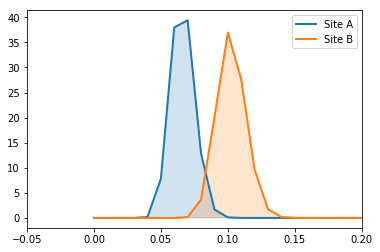

In [7]:
# use all of the data for both sites, then plot the results
siteA_beta = stats.beta.pdf(x, siteA_clicks.sum(), (len(siteA_clicks) - siteA_clicks.sum()))
siteB_beta = stats.beta.pdf(x, siteB_clicks.sum(), (len(siteB_clicks) - siteB_clicks.sum()))

plt.figure(2)
plot_with_fill(x, siteA_beta, 'Site A')
plot_with_fill(x, siteB_beta, 'Site B')
plt.xlim(xmax=.2)
plt.legend()
plt.show()

In [8]:
# generate random samples from each distribution
sim_size = 10000
siteA_rand = np.random.beta(siteA_clicks.sum(), (len(siteA_clicks) - siteA_clicks.sum()), sim_size)
siteB_rand = np.random.beta(siteB_clicks.sum(), (len(siteB_clicks) - siteB_clicks.sum()), sim_size)

a_wins = 0
b_wins = 0
for i in range(sim_size):
    if siteA_rand[i] >= siteB_rand[i]:
        a_wins += 1
    else:
        b_wins += 1

print(f'Likelihood B is better than A based on a simulation of {sim_size} samples: {(b_wins / sim_size):.3}')

Likelihood B is better than A based on a simulation of 10000 samples: 0.995


In [9]:
# compute the 95% confidence on A
confidence_level = .95
siteA_ci_upper = stats.beta.ppf(confidence_level, siteA_clicks.sum(), (len(siteA_clicks) - siteA_clicks.sum()))
siteA_ci_lower = stats.beta.ppf(1-confidence_level, siteA_clicks.sum(), (len(siteA_clicks) - siteA_clicks.sum()))

siteB_ci_upper = stats.beta.ppf(confidence_level, siteB_clicks.sum(), (len(siteB_clicks) - siteB_clicks.sum()))
siteB_ci_lower = stats.beta.ppf(1-confidence_level, siteB_clicks.sum(), (len(siteB_clicks) - siteB_clicks.sum()))

print(f"Site A CTR is: [{siteA_ci_lower:.2} - {siteA_ci_upper:.2}] with {confidence_level:.1%} confidence")
print(f"Site B CTR is: [{siteB_ci_lower:.2} - {siteB_ci_upper:.2}] with {confidence_level:.1%} confidence")


Site A CTR is: [0.052 - 0.081] with 95.0% confidence
Site B CTR is: [0.085 - 0.12] with 95.0% confidence


In [10]:
# compute whether B has is 2% better CTR than A and plot a histogram
a_wins = 0
b_wins = 0
diffs = np.zeros(sim_size)
for i in range(sim_size):
    diffs[i] = siteB_rand[i] - siteA_rand[i]
    if siteA_rand[i] >= siteB_rand[i] - 0.02:
        a_wins += 1
    else:
        b_wins += 1

print(f"Likelihood B is 2% better than A: {(b_wins / sim_size):.2}")

Likelihood B is 2% better than A: 0.88


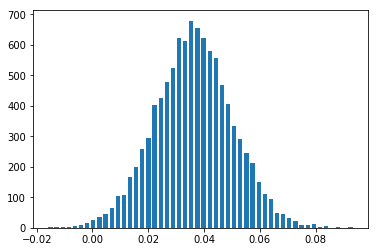

In [11]:
plt.figure(3)
hist, bins = np.histogram(diffs, bins=50)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

We know site B yeilds a 5% increase in profit per click.  

There's an 88% chance that site B provides a 2% lift in CTR.  Thus, there's an 88% chance that investing in site B yeilds.

Site B yileds an additional .02 clicks per visit, plus an additional $.05 per click on every click.  With no lift, that's an additional $.0033 per clicks, plus an additional $.00021 per visit from the lift. 

Swapping depends on how much time/effort switching to site B costs.  

You can determine a break-even point based on $.00351 per visit.

<br>
<br> 
<br>

----

----
Extra Stuff
----

In [3]:
def beta_of_slice(xvals, data, numvals):
    return stats.beta.pdf(xvals, data[:numvals].sum(), (len(data[:numvals]) - data[:numvals].sum()))

def plot_with_fill(x, y, label):
    lines = plt.plot(x, y, label=label, lw=2)
    plt.fill_between(x, 0, y, alpha=0.2, color=lines[0].get_c())

In [5]:
# start with a uniform prior
x = np.arange(0, 1.01, 0.01)
y = stats.beta.pdf(x, 1.0, 1.0)

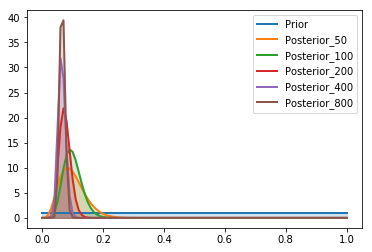

In [6]:
# plot it
plt.figure(1)
plot_with_fill(x,y,'Prior')

# check the data for the first 50, 100, 200, 400, and 800 views
siteA_50 = beta_of_slice(x, siteA_clicks, 50)
plot_with_fill(x,siteA_50,'Posterior_50')

siteA_100 = beta_of_slice(x, siteA_clicks, 100)
plot_with_fill(x,siteA_100,'Posterior_100')

siteA_200 = beta_of_slice(x, siteA_clicks, 200)
plot_with_fill(x,siteA_200,'Posterior_200')

siteA_400 = beta_of_slice(x, siteA_clicks, 400)
plot_with_fill(x,siteA_400,'Posterior_400')

siteA_800 = beta_of_slice(x, siteA_clicks, 800)
plot_with_fill(x,siteA_800,'Posterior_800')

# decorate and show the plot
plt.legend();
plt.show()